                                                           **  TITANIC SURVIVAL PREDICTION**

IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


**DATA COLLECTION AND PROCESSING**

In [ ]:

df=pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape


(891, 12)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

NOTE-WE SEE THERE ARE 177 MISSING VALUES IN COLUMN (Age) AND 687 MISSING VALUES IN COLUMN (Cabin)

**DATA CLEANING**

**Handling missing values**

*1.Dropping Cabin Column*

In [ ]:
titanic_data=df.drop(columns="Cabin",axis=1)

2.* Handling with the missing values of column Age*

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

3*.Replacing missing values of Embarked with it's mode  *

In [ ]:
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [ ]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**PERFORMING ANALYSIS**

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


How many people survived ?


In [ ]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**DATA VISUALIZATION**

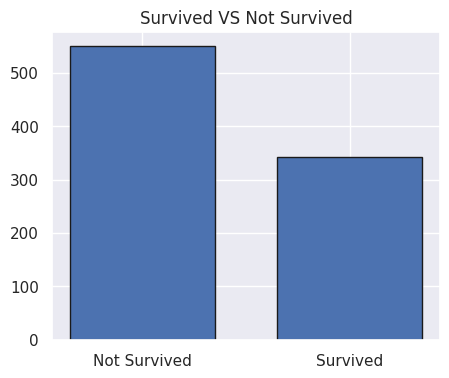

In [ ]:

plt.figure(figsize=(5,4))
plt.title("Survived VS Not Survived")
plt.bar(['Not Survived','Survived'],titanic_data['Survived'].value_counts(),edgecolor='k',width=0.7)
plt.show()

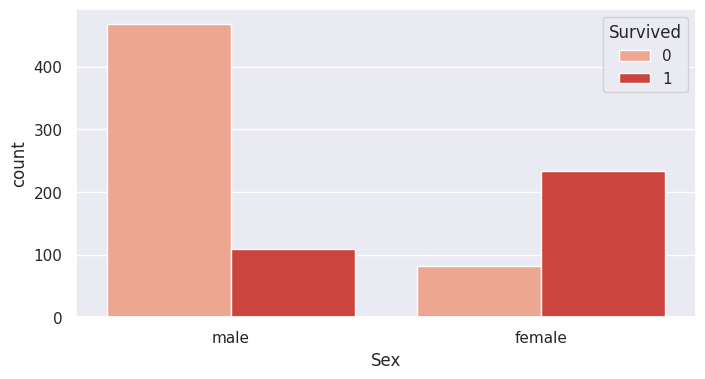

In [ ]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='Sex',hue='Survived',data=titanic_data,palette='Reds')

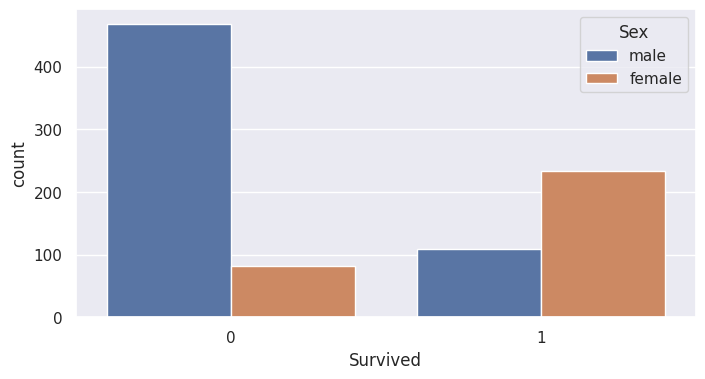

In [ ]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='Survived',hue='Sex',data=titanic_data)

In [ ]:
sns.set()

<Axes: xlabel='Pclass', ylabel='count'>

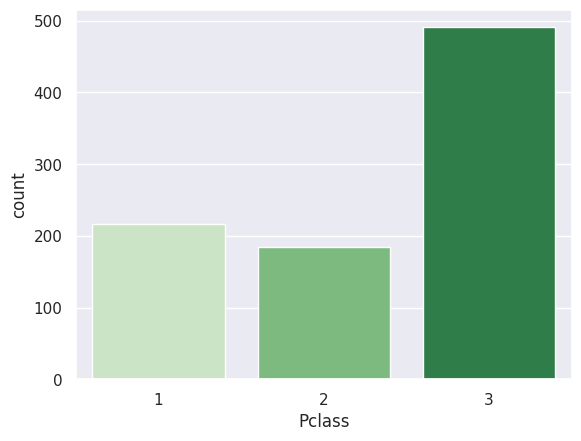

In [ ]:
sns.countplot(x='Pclass', data=titanic_data , palette='Greens')

<Axes: xlabel='Pclass', ylabel='count'>

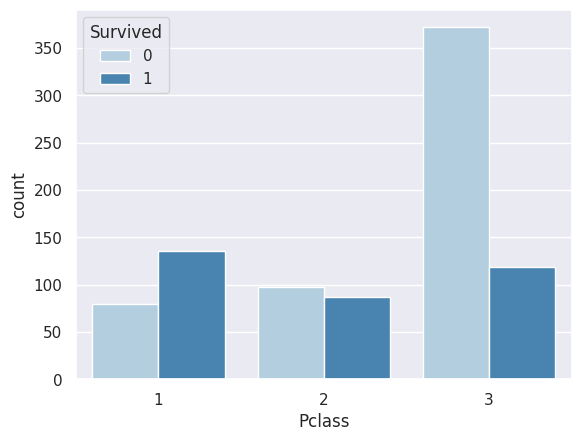

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data , palette='Blues')

In [ ]:
 # converting categorical Columns

titanic_data.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [ ]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         0
1         1    0  38.000000      1      0  71.2833         1
2         3    0  26.000000      0      0   7.9250         0
3         1    0  35.000000      1      0  53.1000         0
4         3    1  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         0
887       1    0  19.000000      0      0  30.0000         0
888       3    0  29.699118      1      2  23.4500         0
889       1    1  26.000000      0      0  30.0000         1
890       3    1  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [ ]:
model = LogisticRegression()
 #training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)

In [ ]:


print(X_train_prediction)

[0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1
 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 0 1 0 1 

In [ ]:
Training_Data_Accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', Training_Data_Accuracy)

Accuracy score of training data :  0.800561797752809


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [ ]:
print(X_test_prediction)

[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1]


In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7988826815642458
